<a href="https://colab.research.google.com/github/Estebansalazar/pytorchprojects/blob/master/LinnearRegression_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install torch

In [0]:
import torch
import torch.nn as nn

#importamos nuestro visualizador de datos
import matplotlib.pyplot as plt

import numpy as np

Text(0.5, 0, 'x')

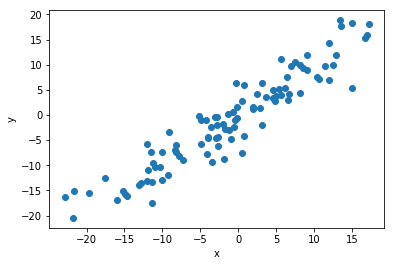

In [0]:
#retorna un tensor con numeros random. 100 filas y 1 columna
X = torch.randn(100,1)*10
#agregamos ruido
y=X + 3*torch.randn(100,1)

plt.plot(X.numpy(),y.numpy(),'o')

#imprimeme la x y la y en cada eje¡. 
plt.ylabel('y')
plt.xlabel('x')

In [0]:
#heredamos de nn.Module
#creamos nuestro inicializador
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear= nn.Linear(input_size,output_size)
    
  def forward(self,x):
    pred =self.linear(x)  
    return pred                    
                           
    

In [0]:
#al escribir linear seteamos valores random para pesos y bias
torch.manual_seed(1)
model =LR(1,1)

print(model);

#imprimeme en una lista lo que model tiene comprimido

print(list(model.parameters()))

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [0]:
#desempaquetamos model.parameters, dentro de un arreglo con w y b. Almacenamos los parametros dentro de este arreglo
[w,b]=model.parameters()
print(w,b)

#w es una matriz de [0][0]
# b es un vector con valor 0
#item nos permite obtener los valores almacenados
#w1=w[0][0].item()
#b1=b[0].item()
#print(w1,b1)

def get_params():
  return (w[0][0].item(),b[0].item())

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [0]:
def plot_fit(title):
  plt.title=title
  #igualamos nuestros parametros a sus pess y bias
  w1,b1=get_params()
  #creamos un array entre --30 y 30
  x1=np.array([-30,30])
  y1=w1*x1 +b1
  plt.plot(x1,y1,'r')
  plt.scatter(X,y)
  plt.show()

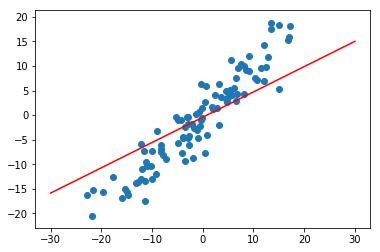

In [0]:
plot_fit('initial model')

In [0]:
#llamamos la funcion de perdida de pytorch
criterion=nn.MSELoss()
#usamos el optiizador estocastico gradien descent, con un learning rate de 0.01
optimizer =  torch.optim.SGD(model.parameters(),lr=0.01)
 

In [19]:
#epochs cuantas veces queremsos que se repita el proceso de iteración
epochs=200
losses=[]

#en cada epoch queremos reducir el error de nuestro modelo
for i in range(epochs):
  #hacemos una predicción para cada valor de X usando el método forward, es decir model tiene nuiestros pesos y bias y le pasamos el x para que realice el forward
  y_pred=model.forward(X)
  
  #calculamos el mean square erro con el valor predecido y con el valor actual
  loss = criterion(y_pred,y)
  #para cada epochs printearemos el loss  
  print("epochs:",i,"loss:",loss.item())
  
  #1agregamos nuestros resultados a un array
  losses.append(loss)
  
  #2debemos dejar nuestros gradientes en cero, ya que estos se van acumulando haciendo el loss backforward esto con :  optimizer.zero_grad()
  optimizer.zero_grad()
  
  #3realizamos el backforward propagation al algoritmo
  
  loss.backward()
  
  #4le hacemos un update a nuestros parametros (optimizar), esto con la funcion por defecto step()
  
  optimizer.step()
  
  
  
  
  
  #optimizamos nuestros parametros 
  

epochs: 0 loss: 9.977272033691406
epochs: 1 loss: 9.977171897888184
epochs: 2 loss: 9.97707462310791
epochs: 3 loss: 9.976983070373535
epochs: 4 loss: 9.976892471313477
epochs: 5 loss: 9.976807594299316
epochs: 6 loss: 9.976724624633789
epochs: 7 loss: 9.976646423339844
epochs: 8 loss: 9.976570129394531
epochs: 9 loss: 9.976496696472168
epochs: 10 loss: 9.97642707824707
epochs: 11 loss: 9.976359367370605
epochs: 12 loss: 9.97629451751709
epochs: 13 loss: 9.976231575012207
epochs: 14 loss: 9.97617244720459
epochs: 15 loss: 9.976115226745605
epochs: 16 loss: 9.976058959960938
epochs: 17 loss: 9.976007461547852
epochs: 18 loss: 9.975955963134766
epochs: 19 loss: 9.975906372070312
epochs: 20 loss: 9.975859642028809
epochs: 21 loss: 9.975814819335938
epochs: 22 loss: 9.975769996643066
epochs: 23 loss: 9.975728988647461
epochs: 24 loss: 9.975688934326172
epochs: 25 loss: 9.975650787353516
epochs: 26 loss: 9.975613594055176
epochs: 27 loss: 9.975577354431152
epochs: 28 loss: 9.975543975830078

Text(0.5, 0, 'epochs')

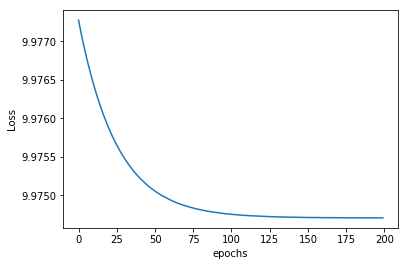

In [21]:
#imprimimos el numero de epochs y en la "y" la perdida
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('epochs')

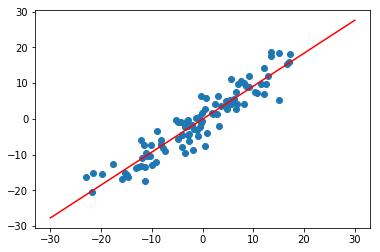

In [22]:
plot_fit("trained Model")